## **Predicting Monthly Electricity Sale Revenue of Residential Sector in the United States**

 Capstone project-2 for Data Science Career Track bootcamp

 Benhur Tedros

## Summary

Today in our world, there are many electric power industries, which cover the generation, transmission, distribution and sale of electric power to the general public and industry. As world’s population, commerce and transportations are expected to grow, the demand for electric power will increase and so does the revenues from the electricity sales. Electricity retailing is the end product of the processes of electric power industry. This industry makes a lot of revenues from electric sales to residential, commercial, and industrial, transportation sectors and others. The other sector refers to activities such as Public Street and highway lighting. The U.S. Energy Information Administration (EIA) collects sales of this electricity and associated revenue, each month, from a statistically chosen sample of electric utilities in the United States. 

The analysis of the sale revenue can help the electric power industry and the government in designing new electric coverage, improving the existing ones and helping their customers better.

## Objective of this project

The goal of this capstone project is to predict the number of monthly revenue from sale of electricity for U.S.

## Data

The dataset for this project was published by U.S. Energy Information Administration and was downloaded from their website. 
The dataset is comprised of year, month, year_month, data status, Revenue in thousand dollars, Sales in megawatt hours, and price in cents/kwh for residential sector. The data includes the years from January 1990 to August 2017 and can be downloaded from:

https://www.eia.gov/electricity/data/eia861m/index.html

        

## Methods/Approach

I will treat this project as a time series analysis related problem.  The following libraries will be used for data loading, wrangling, cleaning, data visualization, developing test harness, data analysis, model evaluation etc. 

+ Pandas

+ Numpy

+ Matplotlib

+ Scikit-learn

+ SciPy

+ Statsmodels





## Data Loading and Wrangling 

The data are stored in MS Excel spreadsheet in CSV format, which was easily loaded into pandas dataframes.

In [58]:
# Importing the required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os
from matplotlib import dates

In [3]:
# Setting up the path directory
os.chdir('F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone_Project_2\\Dataset\Austin')
os.getcwd()

'F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone_Project_2\\Dataset\\Austin'

In [10]:
sale_revenue = pd.read_csv('sales_revenue_monthly.csv')
sale_revenue.head()

,year,month,year_month,Data Status,Revenue_dollar,Sales_Mwatt,Price_Centkwh
0,1990,1,1/1990,Final,6841300,95420231,7.169654
1,1990,2,2/1990,Final,5571807,74498370,7.479099
2,1990,3,3/1990,Final,5442934,71901767,7.569959
3,1990,4,4/1990,Final,5015134,65190618,7.693030
4,1990,5,5/1990,Final,5006417,62881008,7.961731


In [25]:
# converting to datetime format
sale_revenue['year_month'] = pd.to_datetime(sale_revenue['year_month'])
sale_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
year              332 non-null int64
month             332 non-null int64
year_month        332 non-null datetime64[ns]
Data Status       332 non-null object
Revenue_dollar    332 non-null int64
Sales_Mwatt       332 non-null int64
Price_Centkwh     332 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 18.2+ KB


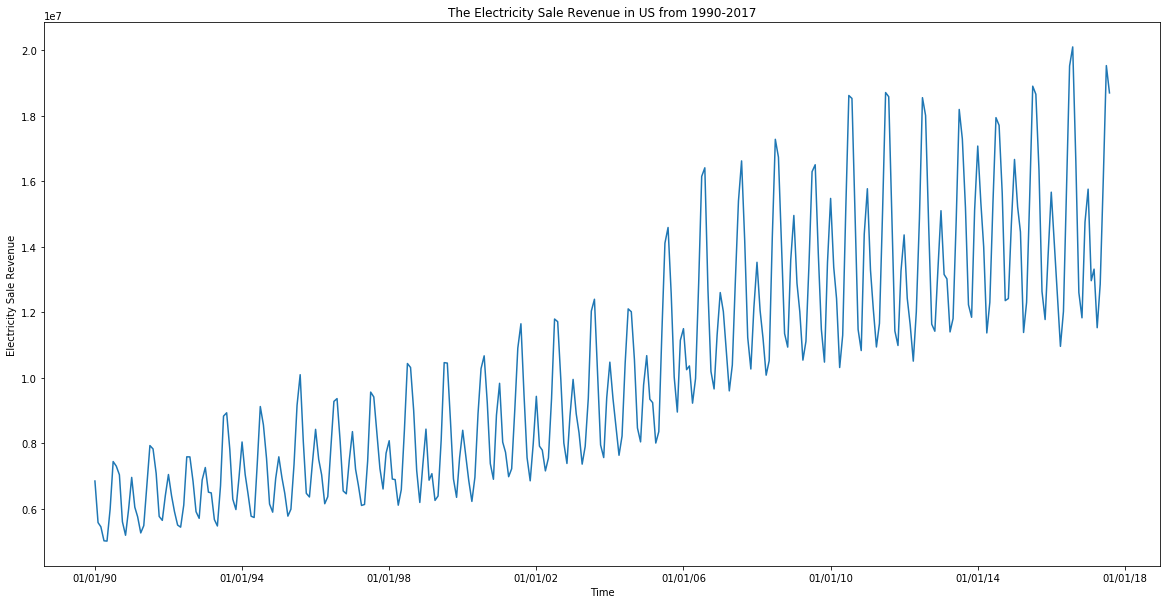

In [77]:
# Let us create dataframe with the time and the revenue dollar 
data_revenue = pd.DataFrame(sale_revenue,columns = ['year_month','Revenue_dollar'])
data_revenue['year_month'] =  pd.to_datetime(data_revenue['year_month'],format='%Y%m%d', errors='coerce')

# plotting the dataset

fig,ax = plt.subplots(figsize=(20,10))

# Changing the x-axis formatting by creating an object of formatter

date_format = '%d/%m/%y'
formatter_date = dates.DateFormatter(date_format)
ax.xaxis.set_major_formatter(formatter_date)

ax.plot(data_revenue['year_month'], data_revenue['Revenue_dollar'])
ax.set_xlabel('Time')
ax.set_ylabel('Electricity Sale Revenue')
ax.set_title('The Electricity Sale Revenue in US from 1990-2017')